# Board Slides for FoodWheel

---

## Project Goals

FoodWheel is a startup delivery service that takes away the struggle of deciding where to eat. FoodWheel picks you an amazing local restaurant and lets you order through the app. 

Senior leadership is getting ready for a big board meeting, and as the resident Data Analyst, you have been enlisted to help decipher data and create a presentation to answer several key questions:

1. What cuisines does FoodWheel offer? Which areas should the company search for more restaurants to partner with?

2. How has the average order amount changed over time? What does this say about the trajectory of the company?

3. How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?

Over this project, I will analyze several DataFrames and create several visualizations to help answer these questions.

---

In [26]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [27]:
restaurants = pd.read_csv('restaurants.csv')
restaurants.head()

,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Roberta’s,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza


In [28]:
# Check number of unique cuisines
restaurants.cuisine.nunique()

7

In [29]:
# Group count by cuisine
cuisine_counts = restaurants.groupby('cuisine').name.count().reset_index()
# Inspect cuisine_counts dataframe
cuisine_counts

,cuisine,name
0,American,10
1,Chinese,11
2,Italian,8
3,Japanese,4
4,Korean,3
5,Pizza,4
6,Vegetarian,4


Let's use this information to create a pie chart.  Make sure that your pie chart includes:
- Labels for each cuisine (i.e, "American", "Chinese", etc.)
- Percent labels using `autopct`
- A title
- Use `plt.axis` to make the pie chart a perfect circle
- `plt.show()` to display your chart

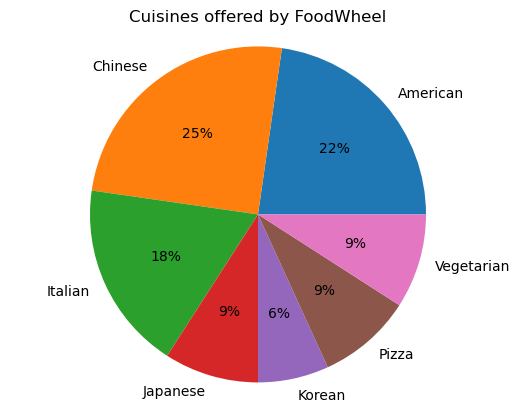

In [30]:
# Create a pie chart
plt.pie(cuisine_counts.name.values,
       labels=cuisine_counts.cuisine.values,
       autopct='%d%%')
plt.axis('equal')
plt.title('Cuisines offered by FoodWheel')
plt.show()

## Visualize Orders over Time

FoodWheel is a relatively new start up.  They launched in April, and have grown more popular since then.  Management suspects that the average order size has increased over time.

Start by loading the data from `orders.csv` into the DataFrame `orders`.

In [31]:
# Create orders dataframe
orders = pd.read_csv('orders.csv')

Examine the first few rows of `orders` using `head`.

In [32]:
# Inspect the orders dataframe
orders.head()

,id,customer_id,date,price
0,1,61,6-18-2017,13.0
1,2,210,5-8-2017,21.0
2,3,0,9-7-2017,33.0
3,4,66,7-7-2017,19.0
4,5,65,4-26-2017,13.0


Create a new column in `order` called `month` that contains the month that the order was placed.

In [33]:
# Create new month column
orders['month'] = orders.date.apply(lambda x: x.split('-')[0])
# Inspect new orders dataframe
orders.head()

,id,customer_id,date,price,month
0,1,61,6-18-2017,13.0,6
1,2,210,5-8-2017,21.0,5
2,3,0,9-7-2017,33.0,9
3,4,66,7-7-2017,19.0,7
4,5,65,4-26-2017,13.0,4


Group `orders` by `month` and get the average order amount in each `month`.

In [34]:
# Create average order by month dataframe
avg_order = orders.groupby('month').price.mean().reset_index()
# Inspect avg_order dataframe
avg_order

,month,price
0,4,9.609195
1,5,14.858824
2,6,15.152174
3,7,18.012821
4,8,21.150685
5,9,29.505882


It looks like the average order is increasing each month.  Great!  We're eventually going to make a bar chart with this information.  It would be nice if our bar chart had error bars.  Calculate the standard deviation for each month using `std`.  Save this to `std_order`.

In [35]:
# Create standard deviation dataframe
std_order = orders.groupby('month').price.std().reset_index()
# Inspect std_order
std_order

,month,price
0,4,2.562504
1,5,3.395210
2,6,2.835934
3,7,2.848985
4,8,4.455556
5,9,4.518806


Create a bar chart to share this data.
- The height of each bar should come from `avg_price`
- Use the standard deviations in `std_order` as the `yerr`
- The error capsize should be 5
- Make sure that you label each bar with the name of the month (i.e., 4 = April).
- Also be sure to label the y-axis
- Give your plot a descriptive title

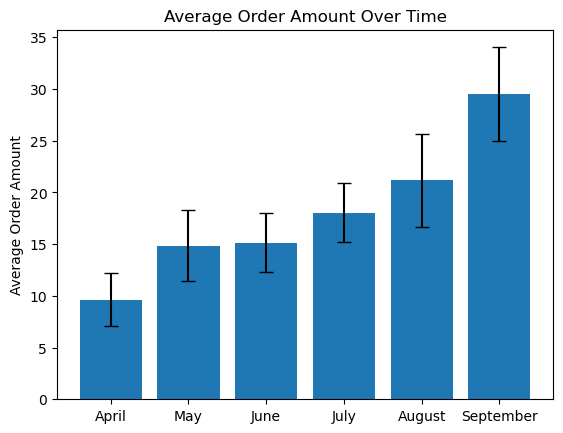

In [36]:
# Create barplot
ax = plt.subplot()
plt.bar(range(len(avg_order)),
       avg_order.price,
       yerr=std_order.price,
       capsize=5)
ax.set_xticks(range(len(avg_order)))
ax.set_xticklabels(['April', 'May', 'June', 'July', 'August', 'September'])
plt.ylabel('Average Order Amount')
plt.title('Average Order Amount Over Time')
plt.show()

## Analyze Customer types

There is a range of amounts that customers spend at FoodWheel.  We'd like to create a histogram of the amount spent by each customer over the past six months.

Start by grouping `orders` by `customer_id` and calculating the total amount spent by each customer.  Save your results to `customer_amount`.

In [37]:
# Create customer amount dataframe
customer_amount = orders.groupby('customer_id').price.sum().reset_index()
# Inspect customer amount
customer_amount.head()

,customer_id,price
0,0,83.0
1,2,11.0
2,3,65.0
3,4,32.0
4,5,119.0


Create a histogram of this data.

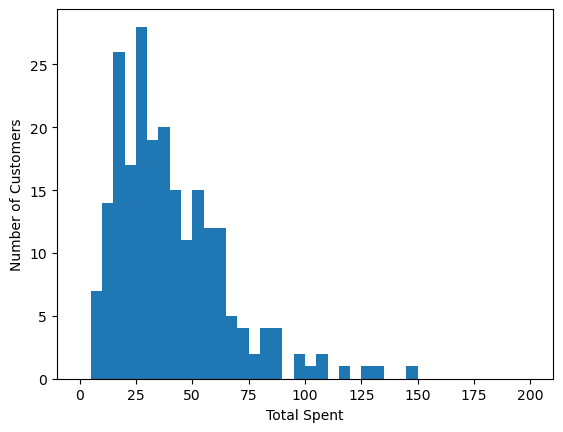

In [38]:
# Create histogram
plt.hist(customer_amount.price.values,
        range=(0, 200), bins=40)
plt.xlabel('Total Spent')
plt.ylabel("Number of Customers")
plt.show()

Create a visualization to display the restaurant count for each neighborhood.

In [39]:
# View the unique neighborhoods
restaurants['neighborhood'].unique()

array(['Midtown', 'Chinatown', 'Brooklyn', 'Queens', 'Downtown', 'Uptown',
       'UWS'], dtype=object)

In [40]:
# Calculate the value counts of the neighborhood variable
restaurants['neighborhood'].value_counts()

neighborhood
Downtown     14
Brooklyn     10
Midtown       8
Chinatown     7
Uptown        3
Queens        1
UWS           1
Name: count, dtype: int64

In [41]:
# Create a list of the neighborhood count values
restaurants['neighborhood'].value_counts().values

array([14, 10,  8,  7,  3,  1,  1])

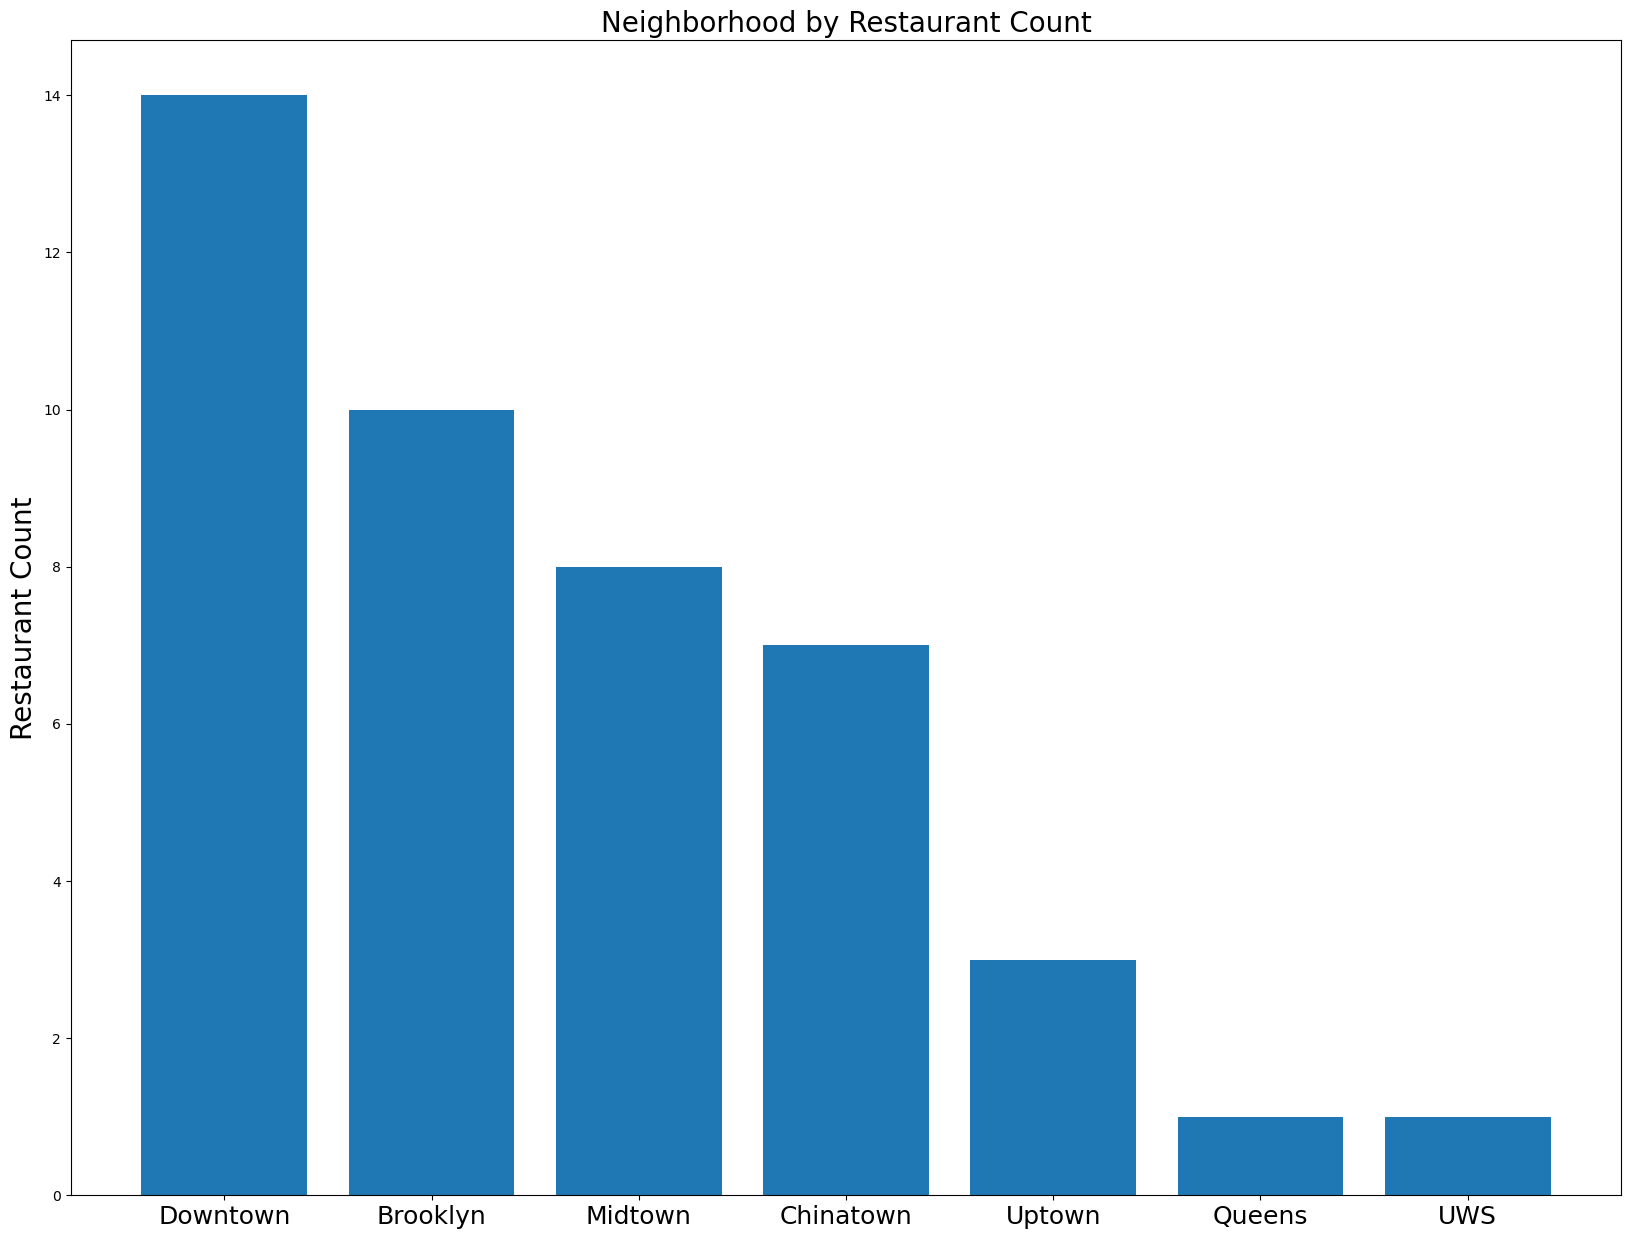

In [42]:
# Create barplot
fig, ax = plt.subplots(figsize=(20,15))
#ax = plt.subplot(figsize=(20,15))
plt.bar(restaurants['neighborhood'].unique(),
        restaurants['neighborhood'].value_counts().values,
       capsize=5)
ax.set_xticks(range(len(restaurants['neighborhood'].unique())))
ax.set_xticklabels(['Downtown', 'Brooklyn', 'Midtown', 'Chinatown', 'Uptown', 'Queens', 'UWS'], fontsize=18)
plt.ylabel('Restaurant Count', fontsize=20)
plt.title('Neighborhood by Restaurant Count', fontsize=20)
plt.show()